In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [7]:
def load_subject(subject, data_directory, threshold):
    file_suffix = 'cells_' + str(threshold)+'unfiltered'
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    
    return df_mouse

# Analysis on Black with father Whole Brain

In [8]:
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject=subject, 
                                                                                               data_directory=data_directory,
                                                                                               threshold=2500), 
                                                                         vol=volumes, 
                                                                         level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/py

In [9]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered.npy', 
                                   allow_pickle=True).item()

In [10]:
subjects = list(dict_results_across_mice.keys())

# List areas with null cell count

In [11]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

# List areas with no volume

In [12]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [13]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['BL53Control', 'BL45Control', 'BL51Control'],
 'Fam': ['BL49Fam', 'BL47Fam', 'BL50Fam'],
 'Unfam': ['BL48Unfam', 'BL54Unfam', 'BL52Unfam', 'BL46Unfam']}

# Calculate cell count across experimental groups

In [14]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [15]:
df_control_cell_count.set_index('area').sum()

BL53Control    101102
BL45Control    164456
BL51Control    183728
dtype: int64

In [16]:
df_fam_cell_count.set_index('area').sum()

BL49Fam    132892
BL47Fam    177987
BL50Fam    161343
dtype: int64

In [17]:
df_unfam_cell_count.set_index('area').sum()

BL48Unfam    151801
BL54Unfam    116642
BL52Unfam     78038
BL46Unfam     78504
dtype: int64

# Look at cell count per area

In [18]:
df_control_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL53Control     460
BL45Control     826
BL51Control    1036
Name: Medial amygdalar nucleus, dtype: int64

In [19]:
df_fam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL49Fam    3559
BL47Fam    2888
BL50Fam    2470
Name: Medial amygdalar nucleus, dtype: int64

In [20]:
df_unfam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL48Unfam    1382
BL54Unfam    1478
BL52Unfam     614
BL46Unfam     991
Name: Medial amygdalar nucleus, dtype: int64

In [21]:
df_control_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL53Control    13
BL45Control    15
BL51Control    10
Name: Ventral premammillary nucleus, dtype: int64

In [22]:
df_fam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL49Fam    699
BL47Fam    519
BL50Fam    389
Name: Ventral premammillary nucleus, dtype: int64

In [23]:
df_unfam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL48Unfam    205
BL54Unfam    241
BL52Unfam    149
BL46Unfam    107
Name: Ventral premammillary nucleus, dtype: int64

In [24]:
df_control_cell_count.set_index('area').loc['Main olfactory bulb']

BL53Control    2115
BL45Control    3235
BL51Control    6076
Name: Main olfactory bulb, dtype: int64

In [25]:
df_fam_cell_count.set_index('area').loc['Main olfactory bulb']

BL49Fam    7991
BL47Fam    8598
BL50Fam    3122
Name: Main olfactory bulb, dtype: int64

In [26]:
df_unfam_cell_count.set_index('area').loc['Main olfactory bulb']

BL48Unfam    2390
BL54Unfam    4663
BL52Unfam    6393
BL46Unfam    8353
Name: Main olfactory bulb, dtype: int64

In [27]:
df_control_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL53Control     54
BL45Control     88
BL51Control    426
Name: Accessory olfactory bulb, dtype: int64

In [28]:
df_fam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL49Fam    351
BL47Fam    210
BL50Fam    210
Name: Accessory olfactory bulb, dtype: int64

In [29]:
df_unfam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL48Unfam     79
BL54Unfam    207
BL52Unfam    138
BL46Unfam    831
Name: Accessory olfactory bulb, dtype: int64

## Calculate t-tests across groups per area

In [30]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [31]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [32]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:35].set_index('area')

,pval_Control_vs_Fam
area,
Cortical amygdalar area,0.000408181
Posterior amygdalar nucleus,0.00215661
Piriform-amygdalar area,0.00245761
Medial amygdalar nucleus,0.00360519
Ventral premammillary nucleus,0.00434438
Basomedial amygdalar nucleus,0.00652926
Intercalated amygdalar nucleus,0.00963451
Piriform area,0.0223093
Nucleus of the lateral olfactory tract,0.0253753


In [33]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']].set_index('area').loc['Ventral premammillary nucleus']

pval_Control_vs_Fam    0.00434438
Name: Ventral premammillary nucleus, dtype: object

In [34]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Subthalamic nucleus,0.003567
Ventral premammillary nucleus,0.0056456
Cortical amygdalar area,0.00942054
Piriform-amygdalar area,0.014057
Lateral posterior nucleus of the thalamus,0.0198758
Anterior hypothalamic nucleus,0.0220681
Parafascicular nucleus,0.0348454
Pretectal region,0.0378001
Vascular organ of the lamina terminalis,0.0382038


In [35]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Unfam    0.565476
Name: Supramammillary nucleus, dtype: object

In [36]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:40].set_index('area')

,pval_Fam_vs_Unfam
area,
Cortical amygdalar area,0.00254563
Intercalated amygdalar nucleus,0.00259365
Medial amygdalar nucleus,0.00333776
Superior colliculus motor related,0.00608734
Posterior amygdalar nucleus,0.00738225
Ventral premammillary nucleus,0.00742647
Posterolateral visual area,0.00942792
Basomedial amygdalar nucleus,0.00976985
Anterodorsal nucleus,0.0107675


In [37]:
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Fam_vs_Unfam    0.0482664
Name: Supramammillary nucleus, dtype: object

## Calculate cross corr across groups per area on cell count

In [38]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)

In [39]:
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)

In [40]:
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

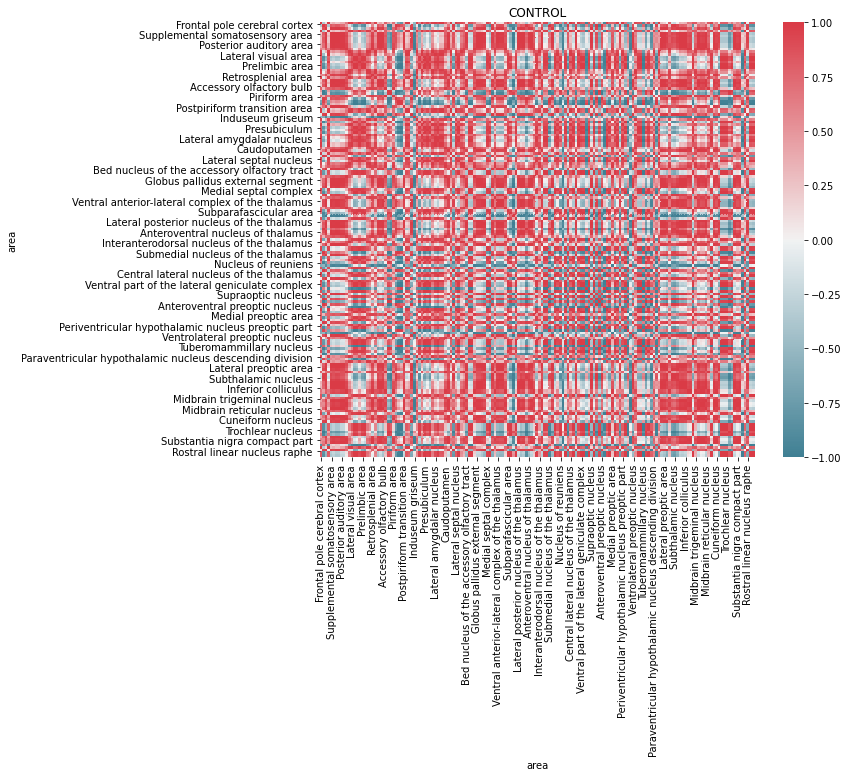

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

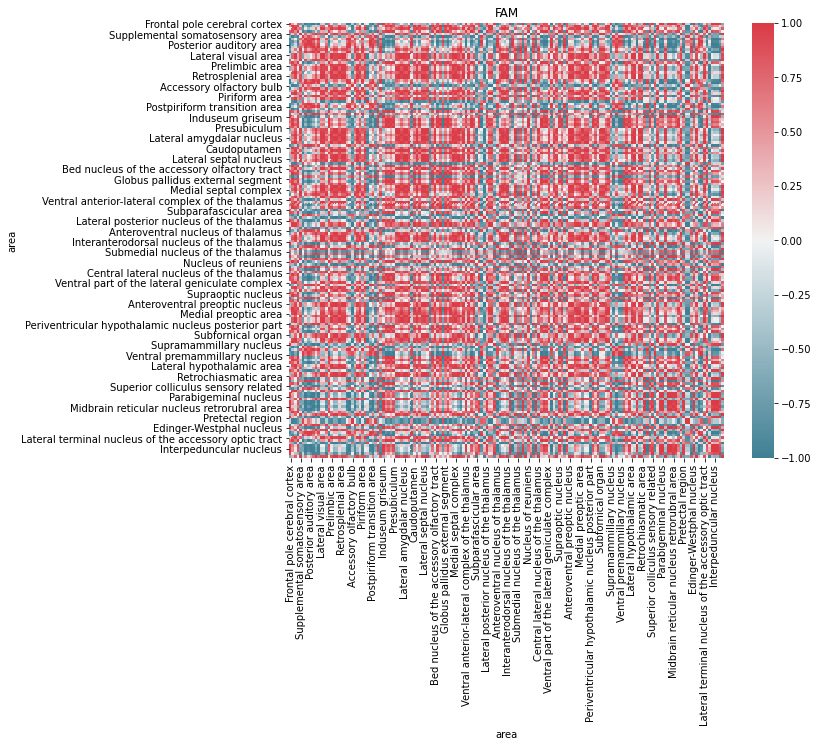

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

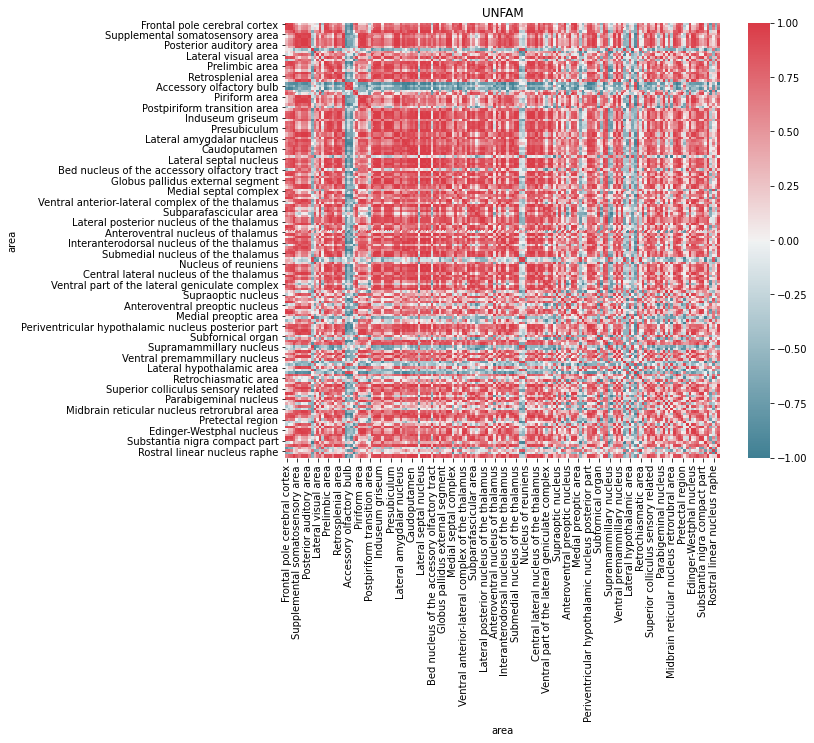

In [43]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [44]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

## T-test on energy across groups

In [45]:
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])

In [46]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [47]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:10].set_index('area')

,pval_Control_vs_Fam
area,
Cortical amygdalar area,0.000832066
Posterior amygdalar nucleus,0.00269781
Intercalated amygdalar nucleus,0.00587032
Piriform-amygdalar area,0.00643
Medial amygdalar nucleus,0.00723747
Basomedial amygdalar nucleus,0.011435
Ventral premammillary nucleus,0.0122067
Subthalamic nucleus,0.013588
Periventricular hypothalamic nucleus posterior part,0.0308032


In [48]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Subthalamic nucleus,0.00164799
Cortical amygdalar area,0.00357247
Ventral premammillary nucleus,0.0100986
Orbital area,0.0137751
Lateral posterior nucleus of the thalamus,0.0143204
Piriform-amygdalar area,0.019319
Anterior olfactory nucleus,0.0215658
Anterior hypothalamic nucleus,0.0221705
Pretectal region,0.0281828


In [49]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Intercalated amygdalar nucleus,0.000395185
Posterior amygdalar nucleus,0.00191604
Cortical amygdalar area,0.00196642
Superior colliculus motor related,0.0024797
Medial amygdalar nucleus,0.00367279
Basomedial amygdalar nucleus,0.00576058
Trochlear nucleus,0.0073498
Midbrain reticular nucleus,0.00992223
Nucleus of the lateral olfactory tract,0.013074


In [50]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)

In [51]:
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)

In [52]:
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

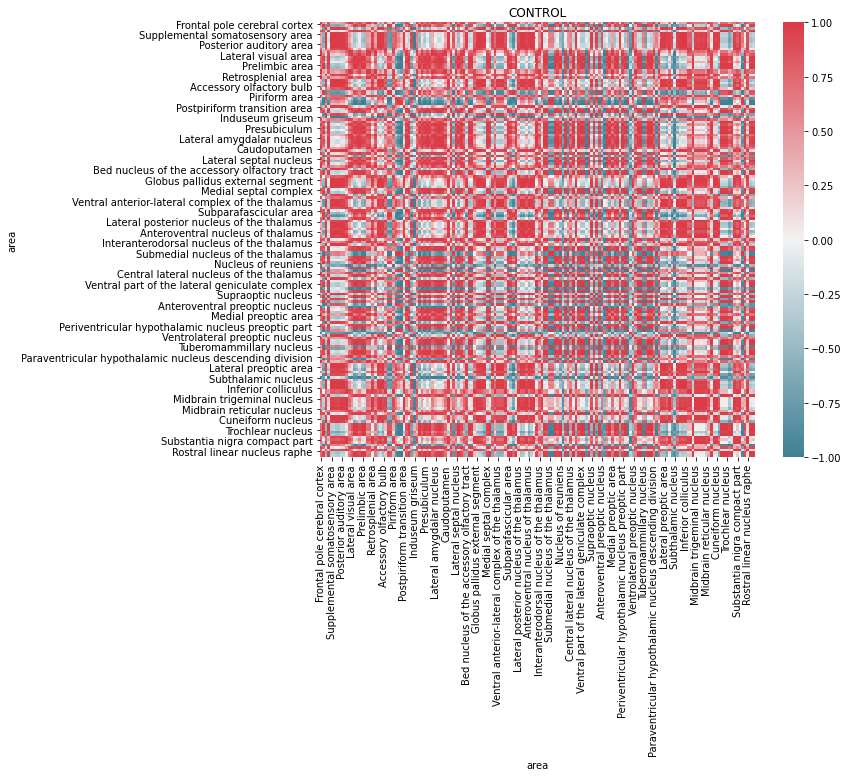

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

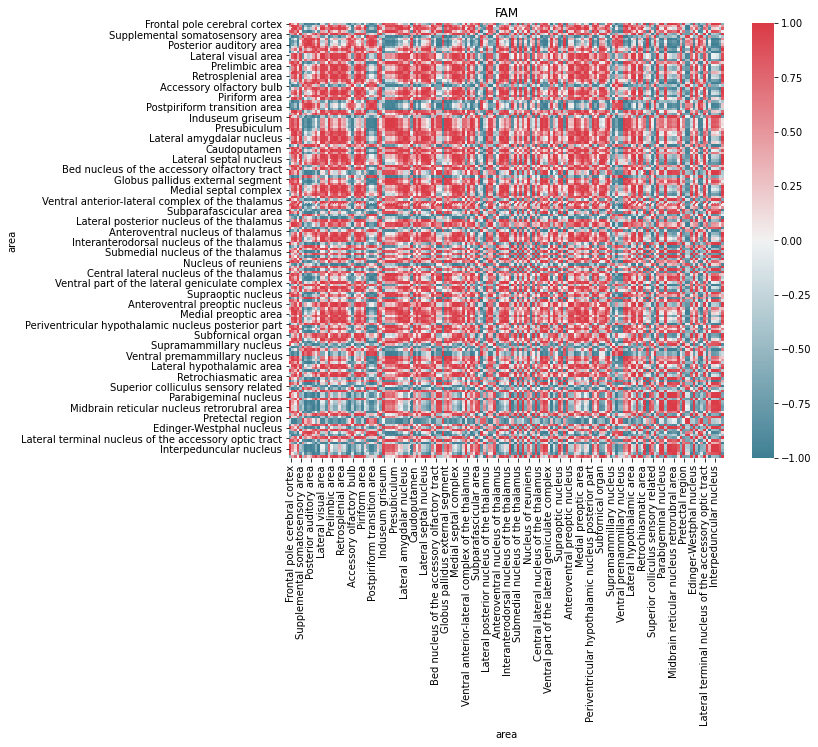

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

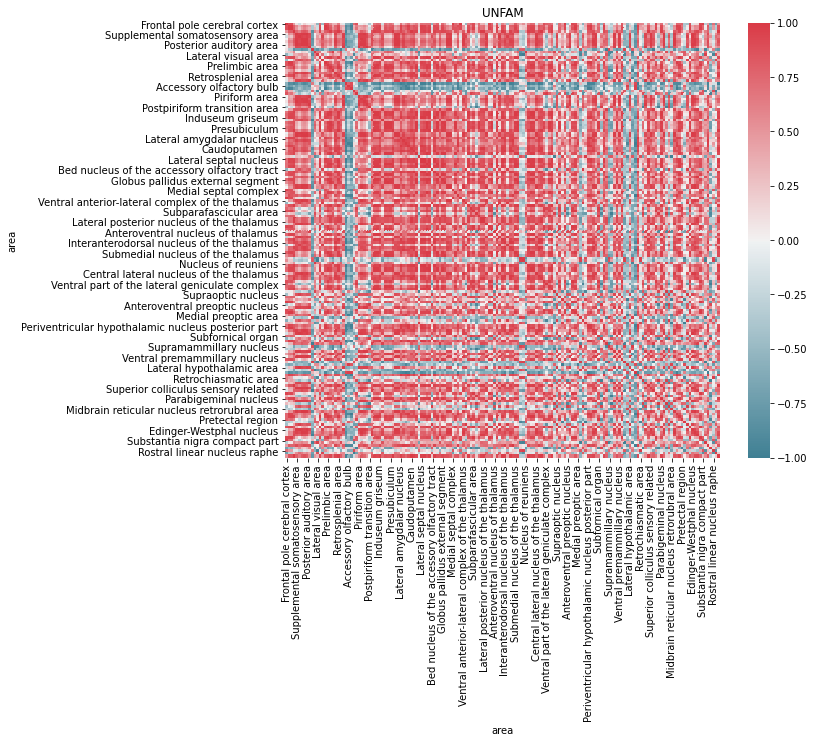

In [55]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate relative density

In [56]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='relative_density')

In [57]:
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])

In [58]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [59]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Basomedial amygdalar nucleus,0.000512496
Intercalated amygdalar nucleus,0.00439787
Medial preoptic area,0.0045636
Agranular insular area,0.00795767
Cortical amygdalar area,0.00814029
Posterior amygdalar nucleus,0.00819586
Nucleus of the lateral olfactory tract,0.00831831
Orbital area,0.0121719
Piriform-amygdalar area,0.0138223


In [60]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,0.000350488
Ventral premammillary nucleus,0.000805572
Cortical amygdalar area,0.00271955
Lateral posterior nucleus of the thalamus,0.00301667
Subthalamic nucleus,0.00371694
Anterior hypothalamic nucleus,0.00540365
Piriform-amygdalar area,0.0121062
Medial amygdalar nucleus,0.0136661
Nucleus accumbens,0.0146112


In [61]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Anterodorsal nucleus,0.0135632
Trochlear nucleus,0.0150112
Posterior limiting nucleus of the thalamus,0.0190002
Nucleus of the lateral olfactory tract,0.0215241
Ventral posterior complex of the thalamus,0.0264241
Fasciola cinerea,0.0287
Rostrolateral visual area,0.0336034
Anterior hypothalamic nucleus,0.0348582
Mediodorsal nucleus of thalamus,0.0464057
